<a href="https://colab.research.google.com/github/chloesung/Econometrics/blob/main/1.%20Panel%20Data%20Methods/Wooldridge/Wooldridge_Ch13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
pip install wooldridge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 5.1 MB/s 


In [2]:
pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 35.9 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import pandas as pd
import numpy as np
import re
import math

import seaborn as sns
sns.set_palette("pastel")
sns.set(style="whitegrid")
import warnings
import matplotlib.pyplot as plt
pal = sns.color_palette('Set1')

from scipy.stats import t
from statsmodels.formula.api import ols
pd.options.display.float_format = '{:.5f}'.format
plt.rcParams['axes.unicode_minus'] = False
import wooldridge
from linearmodels import PanelOLS
from linearmodels import RandomEffects

warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina' #화질 좋게 해주기")

# GPA3

## a) EDA

In [4]:
# Data import
df = wooldridge.data('gpa3')
df.head()

,term,sat,tothrs,cumgpa,season,frstsem,crsgpa,verbmath,trmgpa,hssize,...,female,black,white,ctrmgpa,ctothrs,ccrsgpa,ccrspop,cseason,hsperc,football
0,1,920,31,2.25000,0,0,2.64640,0.48387,1.50000,10,...,1,0,0,NaN,NaN,NaN,NaN,NaN,40.00000,0
1,2,920,43,2.04000,1,0,2.50770,0.48387,2.25000,10,...,1,0,0,0.75000,12.00000,-0.13870,-62.25000,1.00000,40.00000,0
2,1,780,28,2.03000,0,0,2.86790,0.81395,2.20000,123,...,0,0,1,NaN,NaN,NaN,NaN,NaN,82.92683,0
3,2,780,43,2.09000,1,0,2.88390,0.81395,1.60000,123,...,0,0,1,-0.60000,15.00000,0.01600,-73.25000,1.00000,82.92683,0
4,1,810,0,0.00000,0,1,2.76340,0.88372,1.60000,119,...,0,0,1,NaN,NaN,NaN,NaN,NaN,35.29412,0


In [5]:
df.mean()

term           1.50000
sat          898.90710
tothrs        47.03962
cumgpa         2.08086
season         0.67077
frstsem        0.13251
crsgpa         2.77923
verbmath       0.85451
trmgpa         2.33025
hssize       312.76776
hsrank       107.90437
id         15786.41530
spring         0.50000
female         0.24590
black          0.21038
white          0.75683
ctrmgpa        0.01568
ctothrs       13.98087
ccrsgpa        0.05690
ccrspop      -67.66951
cseason       -0.35246
hsperc        34.99677
football       0.32514
dtype: float64

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


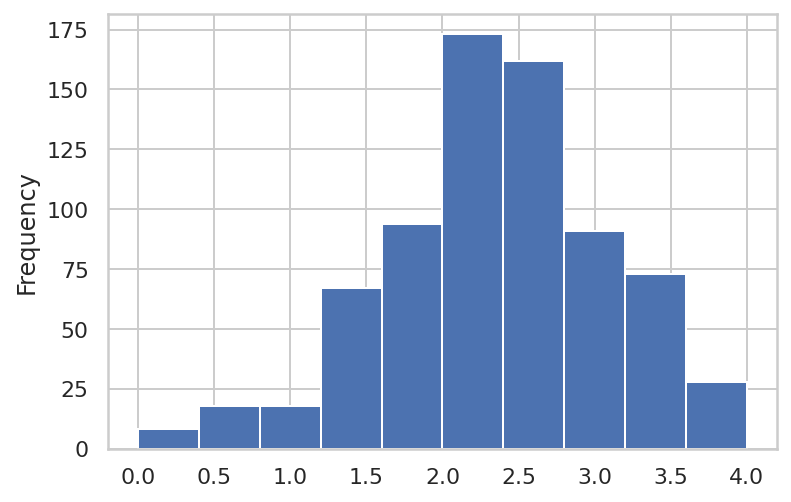

In [6]:
# Dependent Variable: GPA
df['trmgpa'].plot(kind= 'hist')

In [7]:
# Set index to 'id'
df['id'] = df['id'].astype(int)
df = df.set_index('id')

## b) Pooled OLS

In [8]:
res = ols('trmgpa ~  spring + sat + hsperc + female + black + white + frstsem + tothrs + crsgpa + season', data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 trmgpa   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     65.91
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           8.55e-95
Time:                        07:26:18   Log-Likelihood:                -597.97
No. Observations:                 732   AIC:                             1218.
Df Residuals:                     721   BIC:                             1269.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7528      0.348     -5.038      0.0

- *Season* is not statistically significant.
- If the ability levels are correlated with season, then A1 is violated.
- So Pooled OLS estimators can be biased

## c) Data differenced Model

In [9]:
col = ['trmgpa', 'spring', 'sat', 'hsperc', 'female', 'black', 'white', 'frstsem', 'tothrs', 'crsgpa', 'season']
df_1 = df[df['term'] == 1][col]
df_2 = df[df['term'] == 2][col]
df_diff = df_2 - df_1
df_diff.head()

,trmgpa,spring,sat,hsperc,female,black,white,frstsem,tothrs,crsgpa,season
id,,,,,,,,,,,
22,0.75000,1,0,0.00000,0,0,0,0,12,-0.13870,1
35,-0.60000,1,0,0.00000,0,0,0,0,15,0.01600,1
36,-0.31000,1,0,0.00000,0,0,0,-1,14,-0.20340,1
156,0.73000,1,0,0.00000,0,0,0,-1,17,-0.03850,-1
246,-0.20000,1,0,0.00000,0,0,0,0,15,-0.11210,-1


- *sat, hsperc, female, black, white* drops out

In [10]:
res = ols('trmgpa ~  frstsem + tothrs + crsgpa + season', data=df_diff).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 trmgpa   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     23.70
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           2.02e-17
Time:                        07:26:18   Log-Likelihood:                -316.43
No. Observations:                 366   AIC:                             642.9
Df Residuals:                     361   BIC:                             662.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2366      0.206     -1.149      0.2

- Athletes perform more poorly during the semester their sport is in season!